# Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

# Content


The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# LOADING THE DATASET

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
import matplotlib

#Print version for sharing projects
print(f"Pandas Version:Pandas{pd.__version__}")
print(f"Numpy Version:Numpy{np.__version__}")
print(f"Mathplotlib Version:mathplotlib{matplotlib.__version__}")
print(f"Seaborn Version:seaborn{sns.__version__}")
#magic function in notebook display
%matplotlib inlinE

Pandas Version:Pandas1.0.1
Numpy Version:Numpy1.18.1
Mathplotlib Version:mathplotlib3.1.3
Seaborn Version:seaborn0.10.0


In [2]:
#importing the dataset
data=pd.read_csv('creditcard.csv',encoding='latin_1')

In [3]:
#viewing the column heads
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
#viewing the shape of the dataset
data.shape

(284807, 31)

In [5]:
#first 5 rows of the data
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# viewing the last 5 rows of the data
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however we may guess that these features might be orginally credit card number, expirary date, CVV, card holder name, transaction location, transaction date time, etc.

The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# EXPLORATORY ANALYSIS

Once we have imported the dataset into Python, our next task is to explore and clean the data. Cleaning the data is a very essential step before we pass our data into the machine learning models.
Here we focus on three important columns- amount, Class and Time.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#counting the missing value according to the respective column
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We notice that the dataset has two datatypes ie, Float and Integer.We also find that there are no missing values in this dataset. 
It is not necessary that missing values are present in the dataset in the form of NA, NAN, Zeroes etc, it may be present by some other values also that can be explored by analysising the each features.

Highlights

Dataset contains details of 284807 transactions with 31 features. 
There is no missing data in out dataset, every columns contain excatly 284807 rows.
All data types are float64 ,except 1 : Class 
28 columns have sequential Names and values - > V1 , V2 ....V28 
3 columns : TIME , AMOUNT and CLASS which can be analysed for insights !

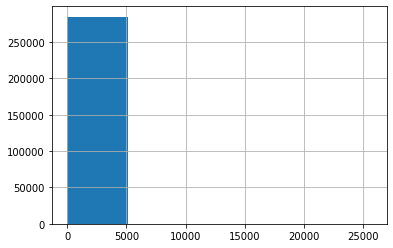

In [10]:
data['Amount'].hist(bins=5)

In [11]:
# viewing the value counts Class columns 
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
# normalising the Class column
data['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

The class category has been divided into twocategory-----class=0 signifying the NON FRAUD TRANSCATIONS ,while,
class=1 stating the FRAUD TRANSCATIONS

Text(0.5, 1.0, 'Fraud v/s Non fraud')

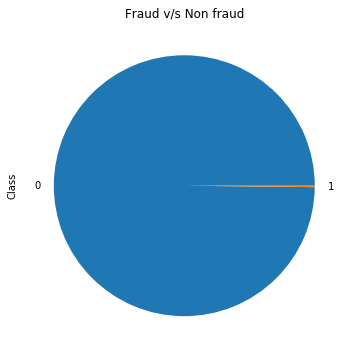

In [13]:
# few the fradualent and non fradualent cases via a pie chart
data['Class'].value_counts().plot(kind='pie',figsize=(6,6))
plt.title('Fraud v/s Non fraud')

This dataset have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud.But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [14]:
# description of few selected columns
data[['Time','Class','Amount']].describe()

,Time,Class,Amount
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.001727,88.349619
std,47488.145955,0.041527,250.120109
min,0.000000,0.000000,0.000000
25%,54201.500000,0.000000,5.600000
50%,84692.000000,0.000000,22.000000
75%,139320.500000,0.000000,77.165000
max,172792.000000,1.000000,25691.160000


On an average, credict card transaction is happening at every 94813.86 seconds.
Average transation amount is 88.35 with standard deviation of 250, with minimum amount of 0.0 and maximum amount 25,691.16. It looks like the feature 'Amount' is higly positive skewed. We will check the distribution graph of amount to get more clarity.

### Dropping Null Values

In [15]:
#dropping duplicates rows
data.drop_duplicates(inplace=True)
data.reset_index(drop = True , inplace = True)

In [16]:
data.shape

(283726, 31)

Its clear that few row gets deleted and boils down to 283726. We find that there are 1081

### Transaction for zero amount

In [17]:
# Transcations with 0 amount
data[data['Amount']==0]['Amount'].count()

1808

In [18]:
# Transcations with amount as 0 and class=1 as Fraud transcations
data[(data['Amount']==0) & (data['Class']==1)]['Amount'].count()

25

It is impossibile to have transation of amount zero from credit card. So these 1808 zero value transaction are actually null values and need to remove. However out of 1808 zero value transations, 25 are actually recognized as fradulent and rest as geninue.

Out data is highly unbalanced, and deleting the fraud transaction will make it more unbalanced.So we will delete only the genuine transactions of zero value.

In [19]:
# droping the ranscations with amount=0 and class=1
data.drop(data[(data['Amount'] == 0) & (data['Class'] == 1)].index, inplace = True)

In [20]:
# Check if zero transactions are removed or not
data[(data['Amount'] == 0) & (data['Class'] == 1)]['Amount'].count()

0

### Distribution of Amount

Text(0.5, 1.0, 'Distribution of transcation amount')

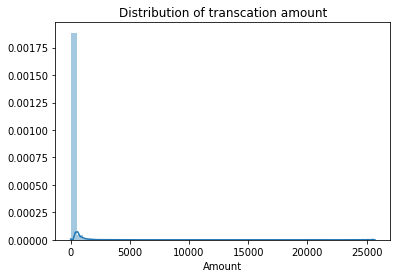

In [21]:
#  plotting the distribution of the amount
sns.distplot(data['Amount'])

plt.title('Distribution of transcation amount')


Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

### distribution of fraud and non fraud transcations

Text(0.5, 1.0, 'Distribution of Non Fraud Transcations')

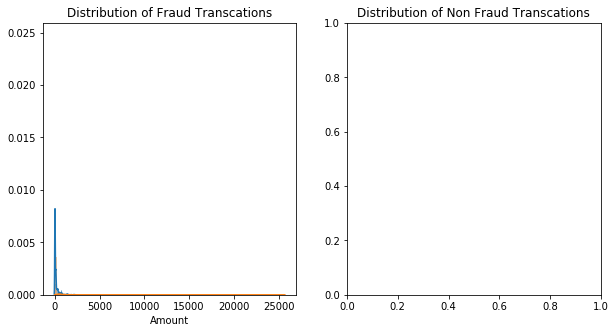

In [22]:
# plottingthe two distributions
fig,axs=plt.subplots(ncols=2,figsize=(10,5))
sns.distplot(data[data['Class']==1]['Amount'],bins=100,ax=axs[0])
axs[0].set_title("Distribution of Fraud Transcations")

sns.distplot(data[data['Class']==0]['Amount'],bins=100,ax=axs[0])
axs[1].set_title("Distribution of Non Fraud Transcations")
                  

In [23]:
data[data['Class']==1]['Amount'].value_counts()

1.00      105
99.99      27
0.76       17
0.77       10
0.01        5
         ... 
104.03      1
925.31      1
323.77      1
57.73       1
529.00      1
Name: Amount, Length: 258, dtype: int64

In [24]:
# maximum transcations of the amount column given the class=1
data[data['Class']==1]['Amount'].max()

2125.87

In [25]:
# minimum transcations of the amount column given the class=1
data[data['Class']==1]['Amount'].min()

0.01

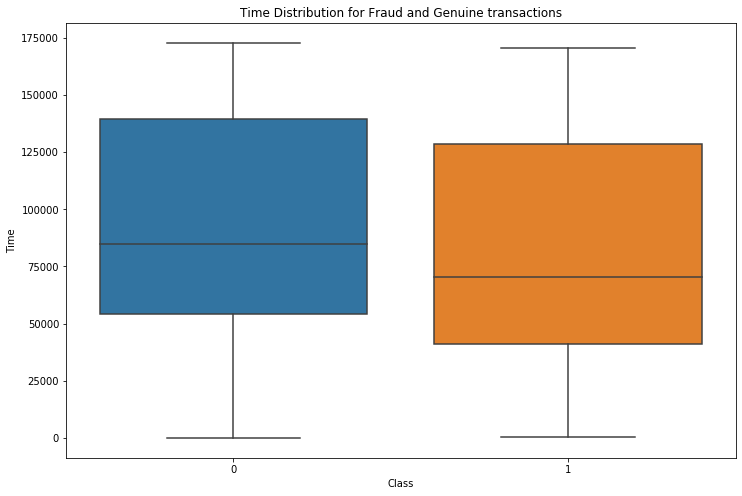

In [26]:
# plotting a boxplot the time distribution of Fraud and Non Fraud transcations
plt.figure(figsize=(12,8))
sns.boxplot(x='Class', y='Time',data = data)
plt.title('Time Distribution for Fraud and Genuine transactions')
plt.show()

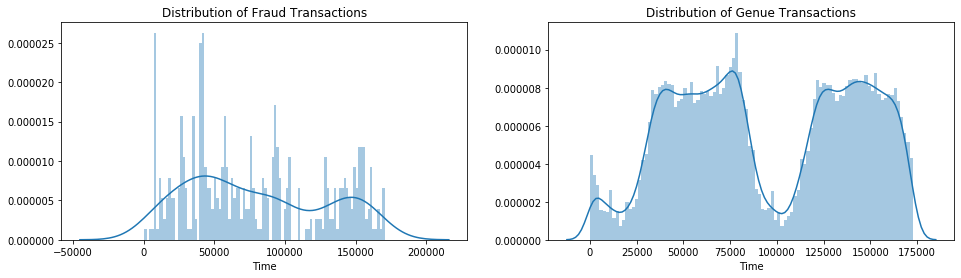

In [27]:
# plotting the distribution of the same
fig,axs=plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(data[(data['Class'] == 1)]['Time'], bins=100, ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(data[(data['Class'] == 0)]['Time'], bins=100, ax=axs[1])
axs[1].set_title("Distribution of Genue Transactions")

plt.show()


## Outlier Treatment

In [28]:
# calculating the upper,lower quartile and the interquatrile range
Q1= np.percentile(data["Amount"],25)
Q3= np.percentile(data["Amount"],75)
IQR= Q3-Q1
print(Q1,Q3,IQR)

5.63 77.52 71.89


In [29]:
# calculating the Lower limits and Upper limits of he box plot to detect the outliers
LL= Q1- (IQR*5)
UL= Q3+ (IQR*5)
print(LL,UL)

-353.82 436.96999999999997


In [30]:
# outlier treatment beyond and below the Ul and LL respectively
AllOutliers = data[(data['Amount'] < LL) | (data['Amount'] > UL)]['Amount']
FrdOutliers = data[(data['Class'] == 1) & ((data['Amount'] < LL) | (data['Amount'] > UL))]['Amount']
GenuOutliers = data[(data['Class'] == 0) & ((data['Amount'] < LL) | (data['Amount'] > UL))]['Amount']

In [31]:
# tottal number of outliers
AllOutliers.count()

11213

In [32]:
# total no of outliers in the Fraud transcation
FrdOutliers.count()

40

In [33]:
# total no of outliers in thr the Non fraud transcation
GenuOutliers.count()

11173

In [34]:
# percentage of Fraud transcation
percentage_of_outliers= (FrdOutliers.count()/ AllOutliers.count())*100
print(percentage_of_outliers.round(2))


0.36


Text(0.5, 1.0, 'Distribution of Amount wrt Class')

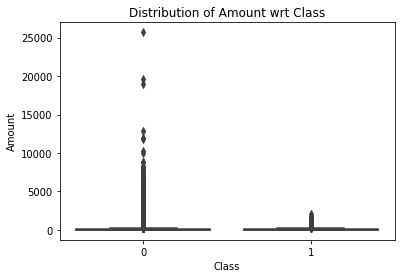

In [35]:
# plotting the box plot for outlier treatment
sns.boxplot(x='Class',y='Amount',data=data)
plt.title('Distribution of Amount wrt Class')

Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also we have should be conscious about that these outlier should not be the fradulent transaction. Generally, fradulent trasactions can of big amount and removing them from the data, can make the predicting model bais.

So we can essentially build a model that realistically predicts transation as fraud without affected by outliers. It may not be really useful to actually have our model train on these extreme outliers.

In [36]:
# dropping the outliers
data=data.drop(AllOutliers.index)

In [37]:
# checking the shape after dropping the outliers
data.shape

(272488, 31)

In [38]:
# reseting thr index
data.reset_index(inplace=True,drop=True)

Text(0.5, 1.0, 'Distribution of Amount wrt to Class')

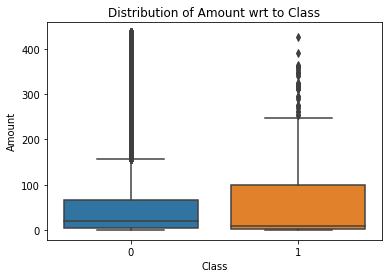

In [39]:
sns.boxplot(x='Class',y='Amount',data=data)
plt.title("Distribution of Amount wrt to Class")

## Correlation Among Explanatory Variables


Having too many features in a model is not always a good thing because it might cause overfitting and worser results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

Another important thing is correlation. If there is very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. However, this does not mean that you must remove one of the highly correlated features.

Lets find out top 10 features which are highly correlaed with price.

In [40]:
# correlation of few transcations
data[['Time','Amount','Class']].corr()

,Time,Amount,Class
Time,1.000000,-0.019494,-0.013218
Amount,-0.019494,1.000000,0.004124
Class,-0.013218,0.004124,1.000000


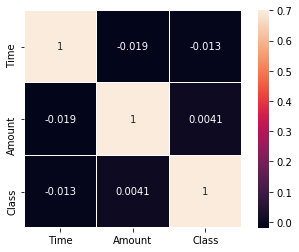

In [41]:
# plotting aheat map to understand the correlation of the few columns
sns.heatmap(data[['Time','Amount','Class']].corr(),square=True,linewidth=0.25,vmax=0.7,annot=True)

# Feature Engineering On Time

## Feature engineering on Time

In [42]:
# Converting time from second to hour
data['Time'] = data['Time'].apply(lambda sec : (sec/3600))

In [43]:
# Calculating hour of the day
data['hour'] = data['Time']%24   # 2 days of data
data['hour'] = data['hour'].apply(lambda x : math.floor(x))

In [44]:
#Calculating First and Second day
data['day'] = data['Time']/24   # 2 days of data
data['day'] = data['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [45]:
data[['Time','hour','day','Amount','Class']]


,Time,hour,day,Amount,Class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
272483,47.996111,23,2,0.77,0
272484,47.996389,23,2,24.79,0
272485,47.996667,23,2,67.88,0
272486,47.996667,23,2,10.00,0


In [46]:
# Fraud transcations per day
Fraud_perday=data[(data['Class']==1)]['day'].value_counts()

In [47]:
# Non fraud transcations per day
NonFraud_perday=data[(data['Class']==0)]['day'].value_counts()

In [48]:
print(Fraud_perday)

1    242
2    166
Name: day, dtype: int64


In [49]:
print(NonFraud_perday)

1    138113
2    133967
Name: day, dtype: int64


In [50]:
# all transcations per day
All_transcations= data['day'].value_counts()
print(All_transcations)

1    138355
2    134133
Name: day, dtype: int64


In [51]:
# percent of Fraud transcations
Fraud_percent= Fraud_perday/All_transcations*100
print(Fraud_percent)

1    0.174912
2    0.123758
Name: day, dtype: float64


Text(0.5, 1.0, 'Distribution of Genuine Transcations')

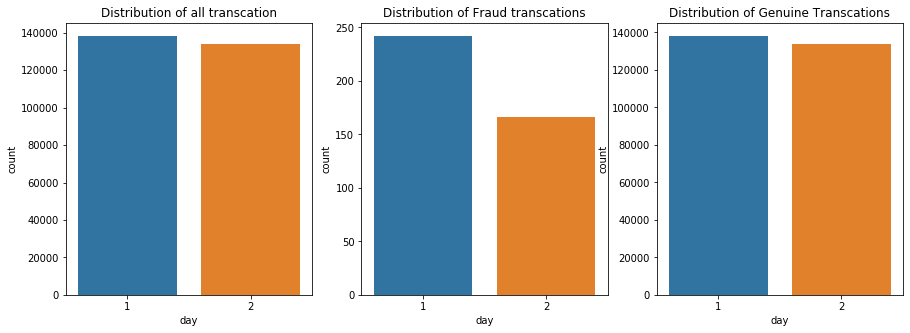

In [52]:
# plotting the Fraud vs Non fraud transcations wrt day
fig,axs= plt.subplots(ncols=3,figsize=(15,5))
sns.countplot(data['day'],ax=axs[0])
axs[0].set_title('Distribution of all transcation')

sns.countplot(data[(data['Class']==1)]['day'],ax=axs[1])
axs[1].set_title('Distribution of Fraud transcations')

sns.countplot(data[(data['Class']==0)]['day'],ax=axs[2])
axs[2].set_title('Distribution of Genuine Transcations')
              

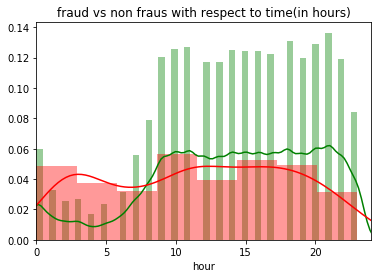

In [53]:
# TO CHECK WETHER THERE IS ANY PARTICULAR PATTERN FOR FRAUD AND NO FRAUD TRANSCTAIONS WITH RESPECT TO TIME IN HOURS

sns.distplot(data[data['Class']==0]['hour'],color='g')
sns.distplot(data[data['Class']==1]['hour'],color='r')
plt.xlim([0,24])
plt.title('fraud vs non fraus with respect to time(in hours)')
plt.show()

Above graph shows that most of the Fraud transactions are happening at night time (0 to 7 hours) when most of the people are sleeping and Genuine transaction are happening during day time (9 to 21 hours).

## Scalling the amount column

It is good idea to scale the data, so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like salary has range from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
This will result in a better prediction model.
Scaling using the log : There are two main reasons to use logarithmic scales in charts and graphs.

The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data.
The second is to show percent change or multiplicative factors.

In [54]:
# Scale amount by log
data['amount_log'] = np.log(data.Amount + 0.01)

In [55]:
# log transformation
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library

ss = StandardScaler() # object of the class StandardScaler ()
data['amount_scaled'] = ss.fit_transform(data['Amount'].values.reshape(-1,1))


In [56]:
# viewing the portion of the data after the log transformatiuon
data[['Time','hour','day','Amount','amount_log','amount_scaled','Class']]


,Time,hour,day,Amount,amount_log,amount_scaled,Class
0,0.000000,0,1,149.62,5.008166,1.235405,0
1,0.000000,0,1,2.69,0.993252,-0.648839,0
2,0.000278,0,1,378.66,5.936665,4.172636,0
3,0.000278,0,1,123.50,4.816322,0.900440,0
4,0.000556,0,1,69.99,4.248495,0.214222,0
...,...,...,...,...,...,...,...
272483,47.996111,23,2,0.77,-0.248461,-0.673462,0
272484,47.996389,23,2,24.79,3.210844,-0.365427,0
272485,47.996667,23,2,67.88,4.217889,0.187164,0
272486,47.996667,23,2,10.00,2.303585,-0.555095,0


## Exporting the cleaned dataset

In [57]:
# exporting the cleaned dataset
data.to_csv('Creditcard_CleanedData1.csv')

## Loading the new dataset and it's analysis

In [58]:
# importing the cleaned datset for modelling
data1=pd.read_csv('Creditcard_Cleaneddata1.csv')

In [59]:
data1.head()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V25,V26,V27,V28,Amount,Class,hour,day,amount_log,amount_scaled
0,0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0,1,5.008166,1.235405
1,1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,0.167170,0.125895,-0.008983,0.014724,2.69,0,0,1,0.993252,-0.648839
2,2,0.000278,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0,1,5.936665,4.172636
3,3,0.000278,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,0.647376,-0.221929,0.062723,0.061458,123.50,0,0,1,4.816322,0.900440
4,4,0.000556,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.206010,0.502292,0.219422,0.215153,69.99,0,0,1,4.248495,0.214222


In [60]:
data1.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class', 'hour', 'day', 'amount_log', 'amount_scaled'],
      dtype='object')

In [61]:
data.shape

(272488, 35)

# Train and Test Spliiting

We dont use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [62]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split

In [63]:
# Separate Target Variable and Predictor Variables
X = data1.drop(['Time','Class','hour','day','Amount','amount_log','amount_scaled'],axis=1)
y = data['Class']

In [64]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [65]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (190741, 29)
y_train -  (190741,)
X_test -  (81747, 29)
y_test -  (81747,)


# Model Building

We are aware that our dataset is highly imbalanced, however we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally we will compare each regression models performance.¶

## Logistic Regression

In [66]:
# importing the library for Logistic Regression
from sklearn.linear_model import LogisticRegression

In [67]:
# splitting the dataset for training and testing process
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Sequence for splitting

# fitting the data
logreg = LogisticRegression(solver='lbfgs') # () towards the end
logreg.fit(X_train, y_train)


C:\Users\KOMAL WAHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [68]:
# prediiting the y variable
y_pred = logreg.predict(X_test)

### Model Evaluation

In [69]:
# importing the libaray
from sklearn import metrics

The classification report visualizer displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are in the range (0.0, 1.0) to facilitate easy comparison of classification models across different classification reports.

In [70]:
# viewing the classification report
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81640
           1       0.76      0.48      0.59       107

    accuracy                           1.00     81747
   macro avg       0.88      0.74      0.79     81747
weighted avg       1.00      1.00      1.00     81747



In [71]:
# viewing the accuracy score
metrics.accuracy_score(y_test,y_pred)

0.999119233733348

In [72]:
# viewing the predicted number of Fraud and Non Fraud transcations
pd.Series(y_pred).value_counts()

0    81680
1       67
dtype: int64

In [73]:
# viewing the actual Fraud and Non Fraud transcations
pd.Series(y_test).value_counts()

0    81640
1      107
Name: Class, dtype: int64

In [74]:
# actualnumber of correct  prediction
67/107

0.6261682242990654

A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.

In [75]:
# viewing the confusion matrics
confusion_metrics=metrics.confusion_matrix(y_test,y_pred)

In [76]:
confusion_metrics

array([[81624,    16],
       [   56,    51]], dtype=int64)

In [77]:
# accuracy level
51/121

0.4214876033057851

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate
False Positive Rate

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. Th

To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve 

In [78]:
metrics.roc_auc_score(y_test,y_pred)

0.738219765828552

In [79]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99964958e-01, 3.50419635e-05],
       [9.99794741e-01, 2.05258908e-04],
       [9.99629554e-01, 3.70446494e-04],
       ...,
       [9.99999541e-01, 4.59282997e-07],
       [9.99704391e-01, 2.95609242e-04],
       [9.99393125e-01, 6.06875127e-04]])

In [80]:
plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

<Figure size 576x432 with 0 Axes>

In [81]:
auc = metrics.roc_auc_score(y_test, y_pred)
print('AUC-',auc)

AUC- 0.738219765828552


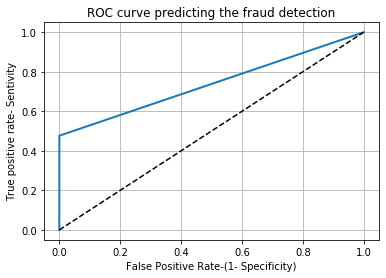

In [82]:
plt.plot(fpr,tpr,linewidth=2)

plt.title('ROC curve predicting the fraud detection')
plt.xlabel('False Positive Rate-(1- Specificity)')
plt.ylabel('True positive rate- Sentivity')
plt.grid(True)
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

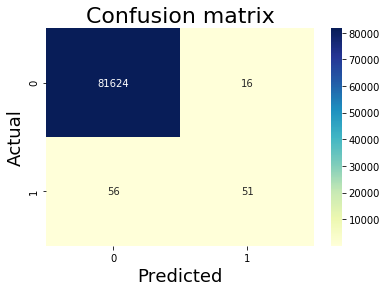

In [83]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

###  Undersampling with Logistic Regression and its Evaluation

In [84]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [85]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))
# Accuracy is surely reduced , let's look at the roc curve now

Accuracy : 0.9183673469387755
AUC :  0.9173561991191778


C:\Users\KOMAL WAHI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


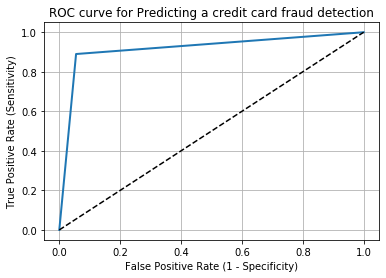

In [87]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )


Text(33.0, 0.5, 'Actual')

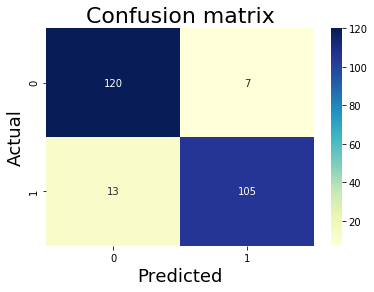

In [88]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)


### Oversampling with Logistic Regression and its Evaluation

In [89]:
from imblearn.over_sampling import RandomOverSampler


In [90]:
ros=RandomOverSampler(random_state=42)
X_res,y_res=ros.fit_resample(X,y)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))

Accuracy : 0.9200909046358914
AUC :  0.9200568725909453


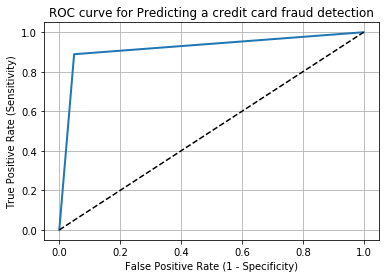

In [92]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

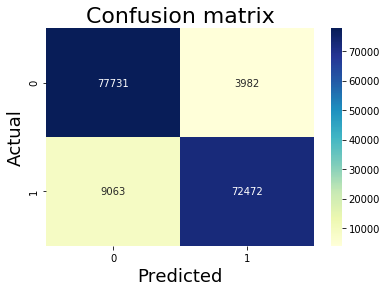

In [93]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

###  SMOTE Sampling with Logistic Regression and its Evaluation

In [94]:
from imblearn.over_sampling import SMOTE, ADASYN

In [95]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))

Accuracy : 0.959840243065765
AUC :  0.9598374034121557


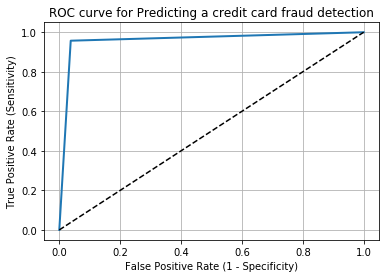

In [97]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

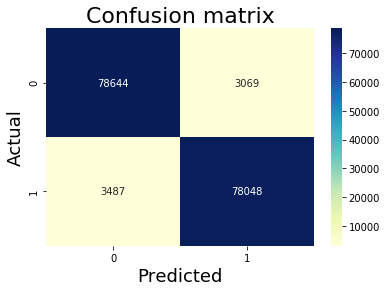

In [98]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

## DecisionTree and its Evaluation

In [99]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))




Accuracy : 0.9993149595703817
AUC :  0.8643206211908218


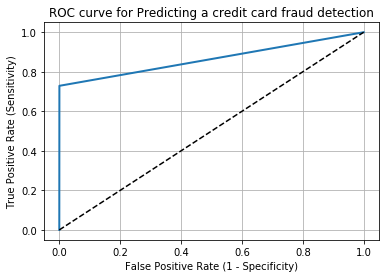

In [101]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

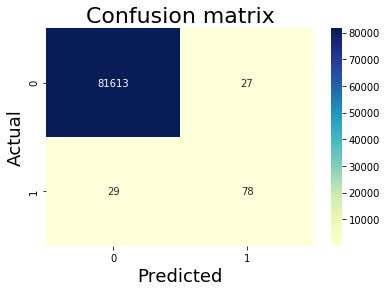

In [102]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

## Decision Tree Classifier with Undersampling data and its Evaluation

In [103]:
# Undersampled data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))


Accuracy : 0.9992660281111233
AUC :  0.8549625779006992


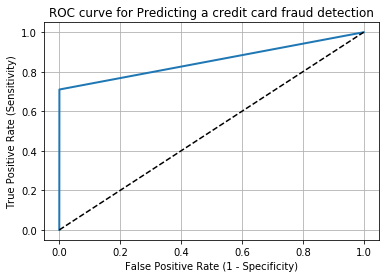

In [104]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

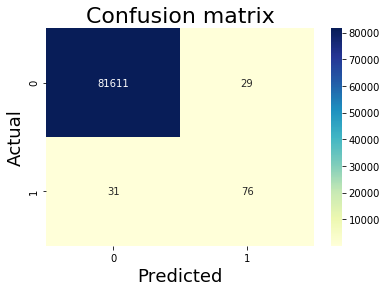

In [105]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

## Decision Tree Classifier with Oversampling data and its Evaluation

In [106]:
# Oversampled data with Decision Tree Classifiers # Best model after Classifier - DTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))

Accuracy : 0.9991926309222356
AUC :  0.8549258312079017


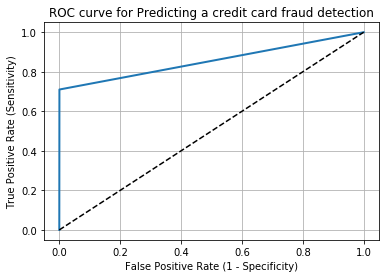

In [107]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

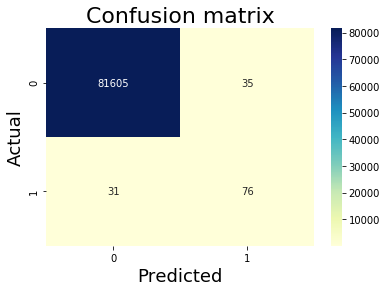

In [108]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

## Decision Tree Classifier with SMOTE data and its Evaluation

In [109]:
# SMOTE data with Decision Tree Classifiers

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

dte = DecisionTreeClassifier()
dte.fit( X_train, y_train )

y_pred = dte.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_pred , y_test))  
print("AUC : ",metrics.roc_auc_score(y_test , y_pred))


Accuracy : 0.999278260975938
AUC :  0.8549687023494988


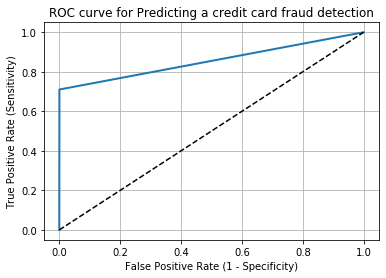

In [110]:
fpr,tpr,thresholds= metrics.roc_curve(y_test,y_pred)
auc=metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,linewidth=2)
plt.grid(True)
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0,1], [0,1], 'k--' )

Text(33.0, 0.5, 'Actual')

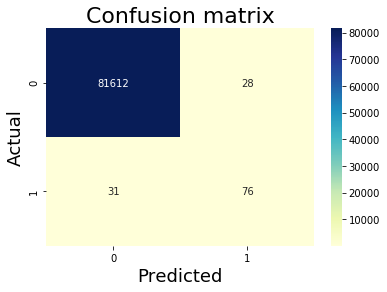

In [111]:
cnf_matrix=metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)